# Eletromag - Simulação Teórica da Etapa 2 -  Projeto WPT

### Import bibliotecas

In [23]:
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [24]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Parâmetros adotados

In [25]:
kr = 12.3 #fator de ajuste das resistências

r1 = 148.5e-3*kr
r2 = 147.8e-3*kr
rc = 1000
l1 = 69.04e-6
l2 = 69.81e-6
c1 = 4.7e-6
c2 = 4.7e-6
k = 0.1

### Cálculo da Frequência de Ressonância LC

In [26]:
w = 1/sqrt(l1*c1)
Fr = w/(2*pi)

In [27]:
print(f'Frequência de Ressonância: {abs(Fr)} Hz')

Frequência de Ressonância: 8835.290049466686 Hz


### Cálculos fasoriais

In [28]:
m = k*sqrt(l1*l2)
xl1 = 1j*w*l1
xl2 = 1j*w*l2
xc1 = 1/(1j*w*c1)
xc2 = 1/(1j*w*c2)
xm = 1j*w*m

### Cálculos do transformador

In [29]:
def CalcularTransformador(v1, rc):
    Z2 = (xc2 * rc) / (xc2 + rc)
    Z=np.array([[r1+xl1+xc1, -xm],[-xm, xl2+r2+Z2]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    V2 = I[1] * Z2
    return I[0], I[1], V2

### Cálculos do nosso circuito

In [30]:
v1 = (6*2)/pi
i1, i2, v2 = CalcularTransformador(v1, rc)
v1ef = v1/sqrt(2)
i1ef = i1/sqrt(2)
v2ef = v2/sqrt(2)
i2ef = i2/sqrt(2)
s2 = v2ef**2 / 1000 #potência calculada no RC
print(f'Corrente i1: {round(abs(i1),4)} A, Corrente i2: {round(abs(i2),4)} A')
print(f'V2: {round(abs(v2),4)} V')
print(f'S2: {round(abs(s2),4)} W')

Corrente i1: 2.0024 A, Corrente i2: 0.421 A
V2: 1.6135 V
S2: 0.0013 W


# Gráficos

## Gráfico das correntes para um K = 0.1

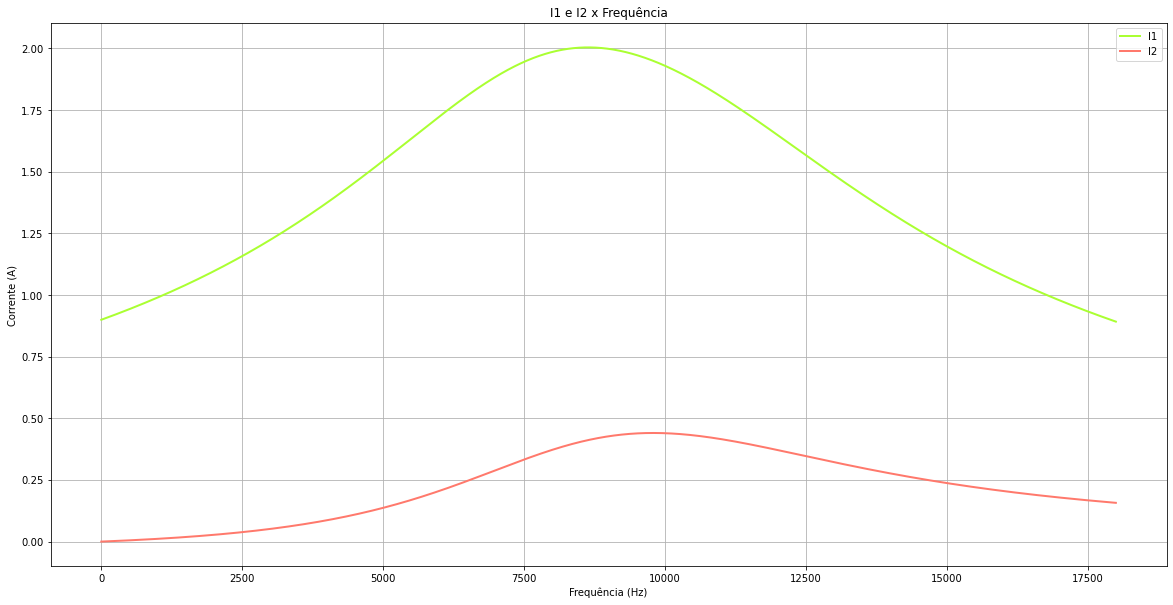

In [31]:
%matplotlib inline

freq_list = []
i1_list = []
i2_list = []

#Main loop da frequência
for f in np.arange(0, 18000.0, 10):
    w = 2*pi*f
    xl1 = 1j*w*l1
    xl2 = 1j*w*l2
    xm = 1j*w*m
    i1, i2, v2 = CalcularTransformador(v1, rc)
    
    freq_list.append(f)
    i1_list.append(abs(i1))
    i2_list.append(abs(i2))
    
# Criando figura
fig = plt.figure(figsize=(20,10))

plt.title('I1 e I2 x Frequência')
plt.plot(freq_list, i1_list, color='xkcd:lime', label='I1', linewidth=2)
plt.plot(freq_list, i2_list, color='xkcd:salmon', label='I2', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")
plt.show()

## Gráfico de i1 x F por K e i2 x F por K

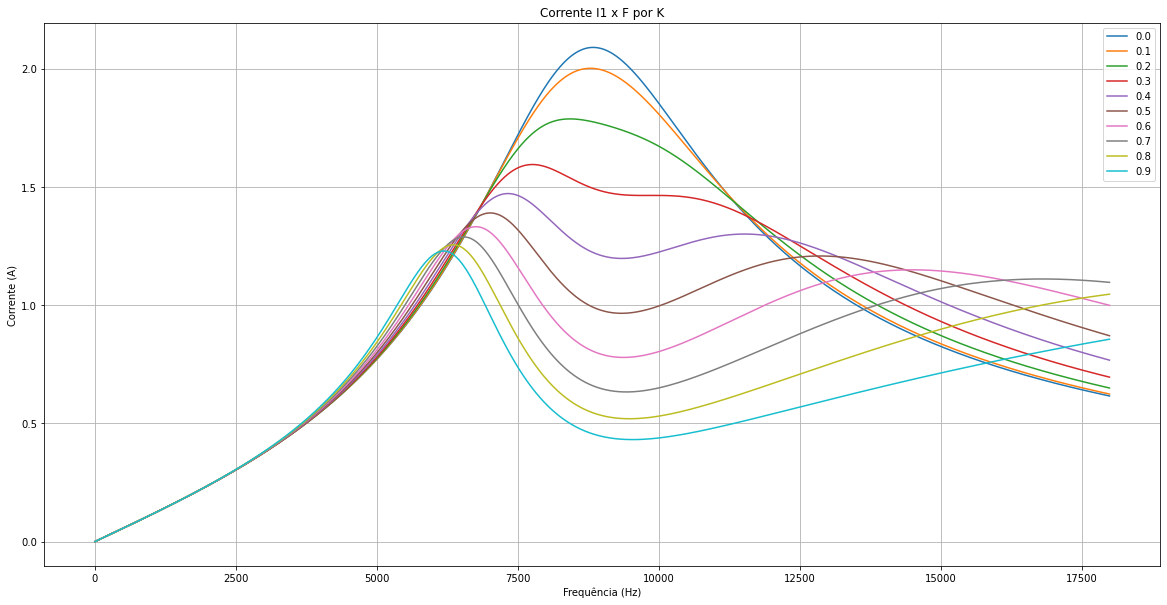

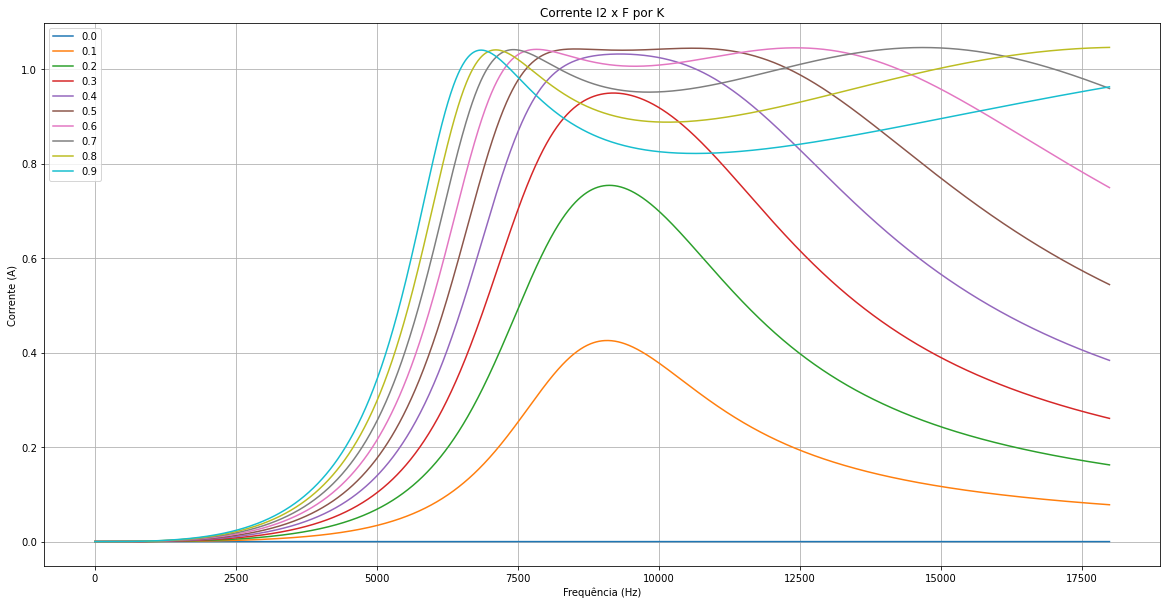

In [32]:
%matplotlib inline

#Lista de valores de K
k_list = np.arange(0,1,0.1)
i1_list_list = []
i2_list_list = []

# Main loop do K
for k in k_list:

    i1_list = []
    i2_list = []
    f_list = np.arange(1, 18000, 10)
    
    # Loop intermediário para gerar cada valor de listas de corrente
    for f in f_list:
        w = 2*pi*f
        m = k*sqrt(l1*l2)
        xl1 = 1j*w*l1
        xl2 = 1j*w*l2
        xc1 = 1/(1j*w*c1)
        xc2 = 1/(1j*w*c2)
        xm = 1j*w*m

        i1, i2, v2 = CalcularTransformador(v1, rc)

        i1_list.append(abs(i1))
        i2_list.append(abs(i2))
        
    i1_list_list.append(i1_list)
    i2_list_list.append(i2_list)

fig = plt.figure(figsize=(20,10))
for i in range(len(i1_list_list)):
    plt.plot(f_list, i1_list_list[i], label=f"{round(k_list[i],1)}")

plt.title('Corrente I1 x F por K')
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")

plt.show()

# Criando figura
fig = plt.figure(figsize=(20,10))

# Plotando cada uma das lista de correntes
for i in range(len(i2_list_list)):
    plt.plot(f_list, i2_list_list[i], label=f"{round(k_list[i],1)}")

plt.title('Corrente I2 x F por K')
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")

plt.show()

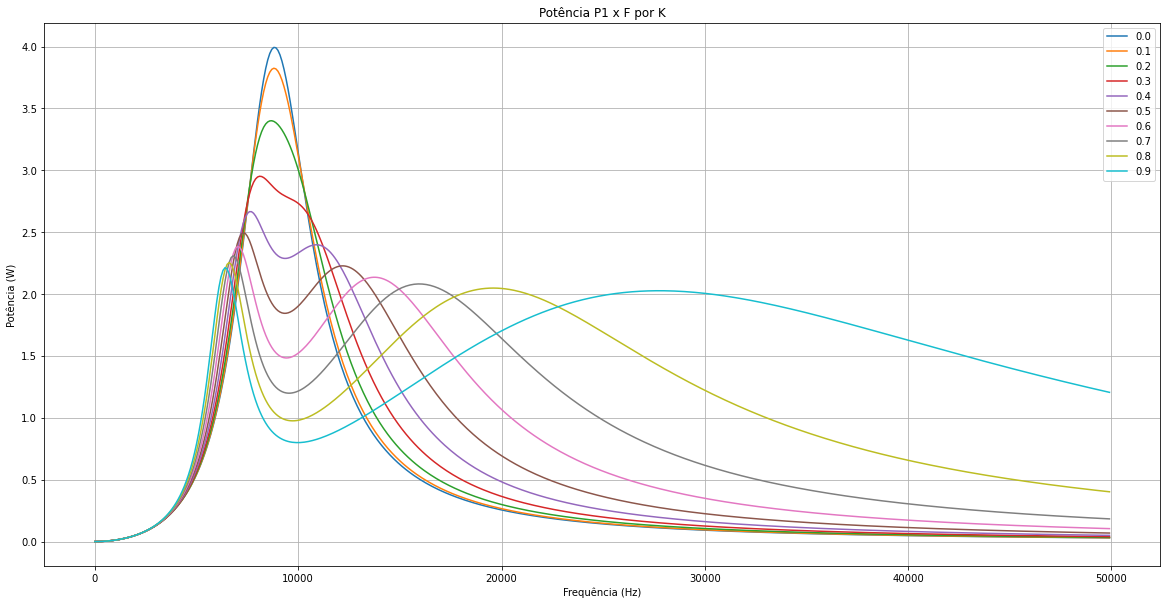

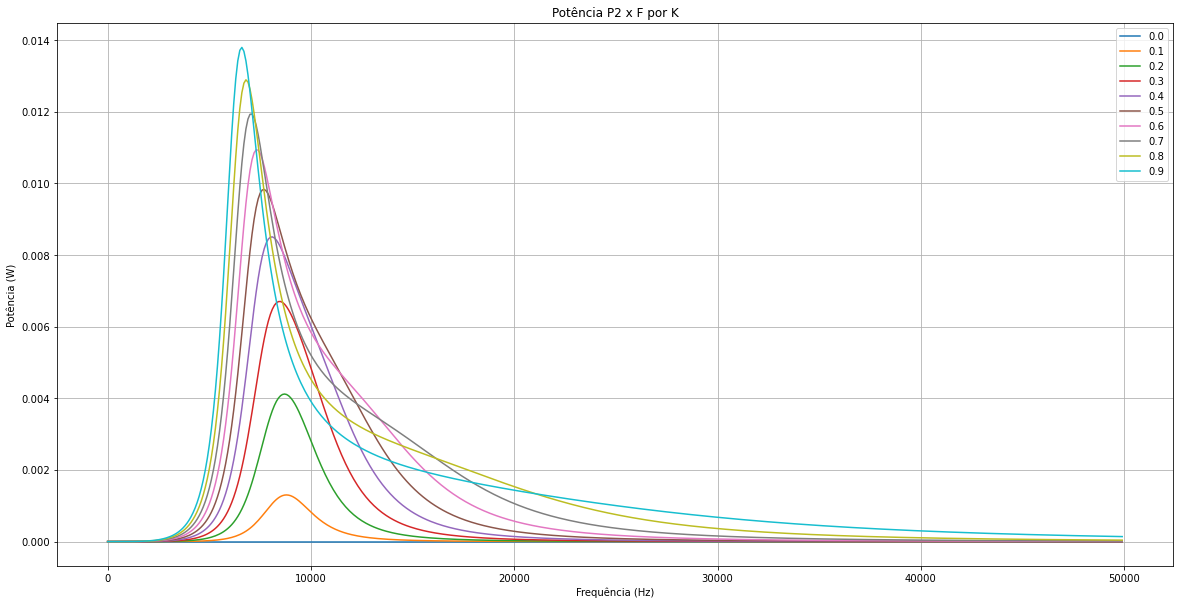

In [33]:
%matplotlib inline

# Lista de valores de K
k_list = np.arange(0,1,0.1)
s1_list_list = []
s2_list_list = []

# Main loop do K
for k in k_list:

    s1_list = []
    s2_list = []
    f_list = np.arange(1, 5e4, 100)
    
    
    # Loop intermediário para gerar cada valor de listas de corrente
    for f in f_list:
        w = 2*pi*f
        m = k*sqrt(l1*l2)
        xl1 = 1j*w*l1
        xl2 = 1j*w*l2
        xc1 = 1/(1j*w*c1)
        xc2 = 1/(1j*w*c2)
        xm = 1j*w*m

        i1, i2, v2 = CalcularTransformador(v1, rc)
        v1ef = v1/sqrt(2)
        i1ef = i1/sqrt(2)
        v2ef = v2/sqrt(2)
        i2ef = i2/sqrt(2)
        s1 = v1ef * i1ef.conjugate()
        s2 = v2ef * i2ef.conjugate()

        s1_list.append(s1.real)
        s2_list.append(s2.real)
        
    s1_list_list.append(s1_list)
    s2_list_list.append(s2_list)
    
    
# Criando figura
fig = plt.figure(figsize=(20,10))

# Plotando cada uma das lista de potências
for i in range(len(s1_list_list)):
    plt.plot(f_list, s1_list_list[i], label=f"{round(k_list[i],1)}")

plt.title('Potência P1 x F por K')
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")

plt.show()

# Criando figura
fig = plt.figure(figsize=(20,10))

# Plotando cada uma das lista de potências
for i in range(len(s1_list_list)):
    plt.plot(f_list, s2_list_list[i], label=f"{round(k_list[i],1)}")

plt.title('Potência P2 x F por K')
plt.legend()
plt.grid()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")

plt.show()